In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.4500625793011847

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897057

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [4]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914472


In [5]:
X_test2

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3
5000,-0.185599,1.548141,-1.132387,-1.753095,0.210170,-0.287334,9.943219,9774.804809,9.664116e+05
5001,-0.185599,-0.645936,-0.423224,0.273376,0.078550,0.119885,9.978816,9915.534321,9.873569e+05
5002,-0.185599,-0.645936,-0.464913,0.300304,0.086287,0.119885,9.976727,9907.233594,9.861174e+05
5003,-0.185599,-0.645936,0.803932,-0.519289,-0.149209,0.119885,10.040116,10161.432714,1.024312e+06
5004,-0.185599,-0.645936,-1.051294,0.679069,0.195119,0.119885,9.947296,9790.846429,9.687916e+05
5005,-0.185599,1.548141,-1.054583,-1.632643,0.195730,-0.287334,9.947131,9790.195557,9.686950e+05
5006,-0.185599,1.548141,-0.437505,-0.677319,0.081201,-0.287334,9.978101,9912.690459,9.869322e+05
5007,-0.185599,-0.645936,1.155908,-0.746643,-0.214536,0.119885,10.057629,10232.517651,1.035080e+06
5008,-0.185599,-0.645936,0.193741,-0.125144,-0.035958,0.119885,10.009682,10038.785671,1.005823e+06
5009,-0.185599,-0.645936,0.108269,-0.069935,-0.020095,0.119885,10.005412,10021.665442,1.003252e+06


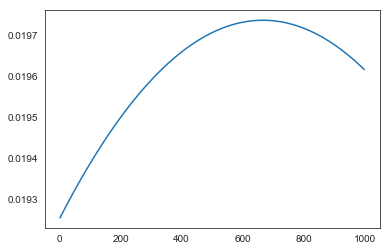

In [42]:
estimates = list()
for i in range(1, 1000, 2):
    lassBig = linear_model.Lasso(alpha= i)
    lassBig.fit(X_train2, Y_train)
    r_sq = lassBig.score(X_test2, Y_test)
    temp = [i, r_sq]
    estimates.append(temp)
    
    
data = pd.DataFrame(estimates, columns=['Lambda', 'R_Sq'])

plt.plot(data.Lambda, data.R_Sq)
plt.show()